#Title: Lab 2 GIS 3, Practice with Python!
##Author: Gabe Morrison
##Desciption: Lab for GIS, learning to us Python for GI Science


In [2]:
import pandas as pd
import geopandas as gpd
#import libpysal.api as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline

In [3]:
df = gpd.read_file('airbnb_Chicago 2015.shp')

In [4]:
df.head()

,community,shape_area,shape_len,AREAID,response_r,accept_r,rev_rating,price_pp,room_type,num_spots,...,crowded,dependency,without_hs,unemployed,income_pc,harship_in,num_crimes,num_theft,population,geometry
0,DOUGLAS,46004621.1581,31027.0545098,35,98.771429,94.514286,87.777778,78.157895,1.789474,38,...,1.8,30.7,14.3,18.2,23791,47,5013,1241,18238,POLYGON ((-87.60914087617012 41.84469250346108...
1,OAKLAND,16913961.0408,19565.5061533,36,99.200000,90.105263,88.812500,53.775000,1.850000,20,...,1.3,40.4,18.4,28.7,19252,78,1306,311,5918,"POLYGON ((-87.592152838785 41.81692934706861, ..."
2,FULLER PARK,19916704.8692,None,37,68.000000,NaN,91.750000,84.000000,1.833333,6,...,3.2,44.9,26.6,33.9,10432,97,1764,383,2876,POLYGON ((-87.62879823732874 41.80189303448802...
3,GRAND BOULEVARD,48492503.1554,28196.8371573,38,94.037037,83.615385,92.750000,119.533333,1.533333,30,...,3.3,39.5,15.9,24.3,23472,57,6416,1428,21929,POLYGON ((-87.60670812560372 41.81681377137391...
4,KENWOOD,29071741.9283,23325.1679062,39,92.542857,88.142857,90.656250,77.991453,1.615385,39,...,2.4,35.4,11.3,15.7,35911,26,2713,654,17841,"POLYGON ((-87.592152838785 41.81692934706861, ..."


In [5]:
pd.isnull(df['price_pp']).sum()

8

In [6]:
df=df
df['price_pp'].fillna((df["price_pp"].mean()), inplace=True)

In [7]:
import seaborn as sbn

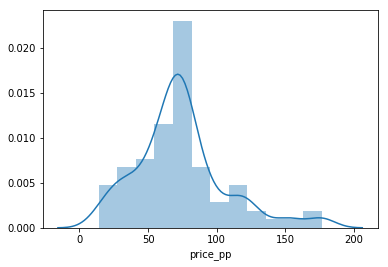

In [8]:
sbn.distplot(df['price_pp'])

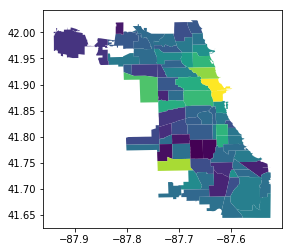

In [9]:
df.plot(column='price_pp')

In [10]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install mapclassify

Note: you may need to restart the kernel to use updated packages.


In [12]:
import descartes as des
import mapclassify as mpc



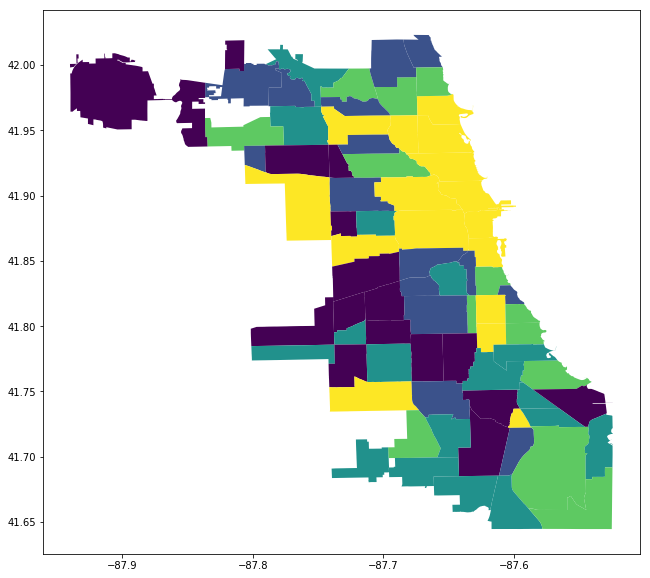

In [13]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', ax=ax)

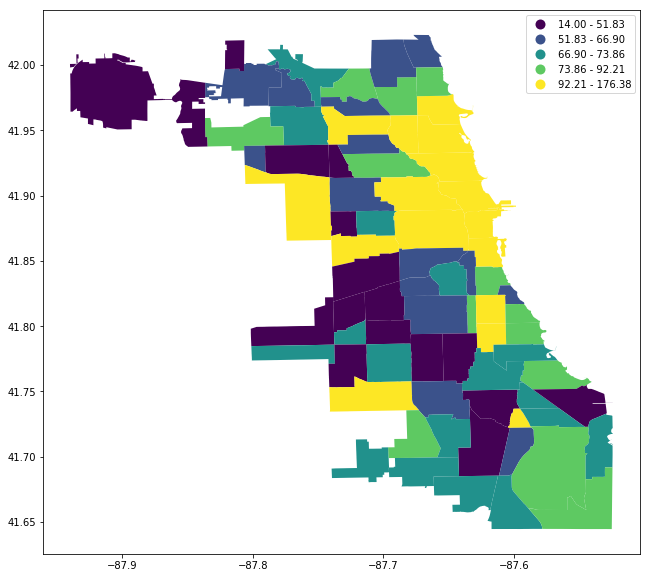

In [14]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'}) 
df.plot(column='price_pp', scheme='Quantiles', legend=True, ax=ax)

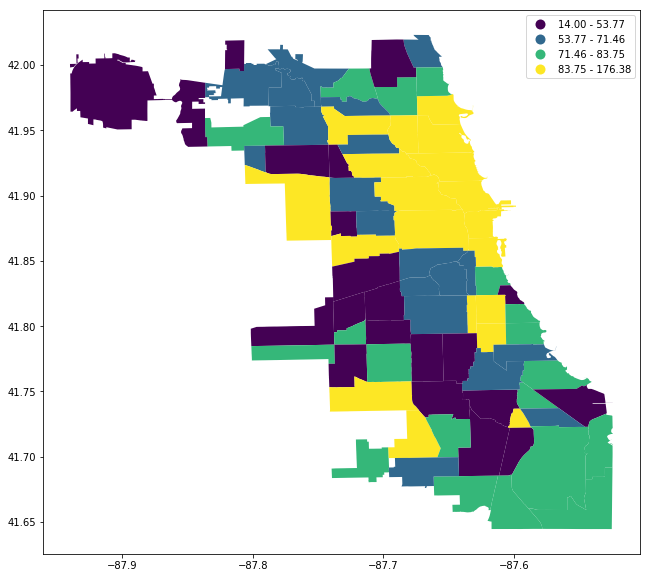

In [15]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'}) 
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax)

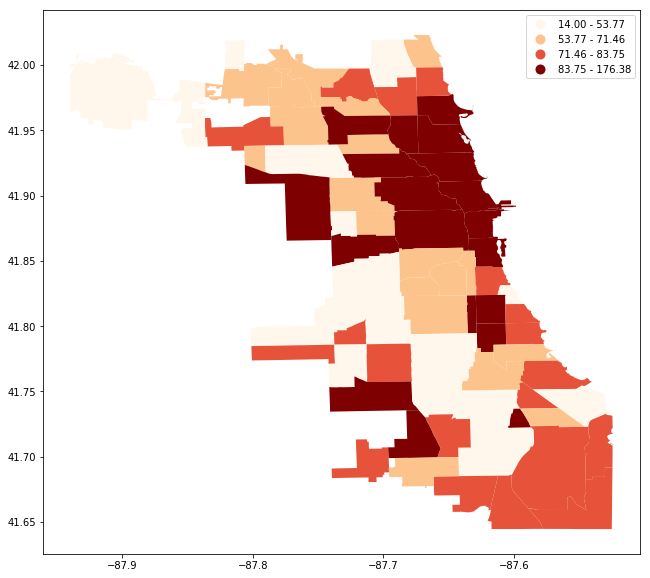

In [16]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='price_pp', scheme='Quantiles', k=4, legend=True, ax=ax,
        cmap='OrRd')

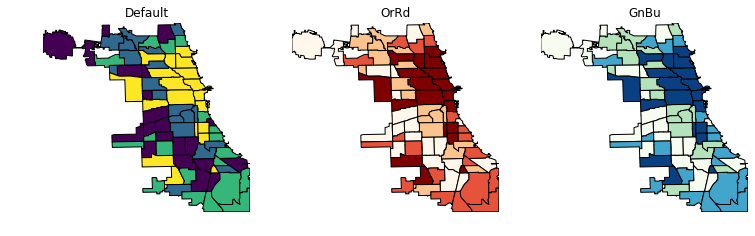

In [17]:
 f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Default")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("OrRd")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("GnBu")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

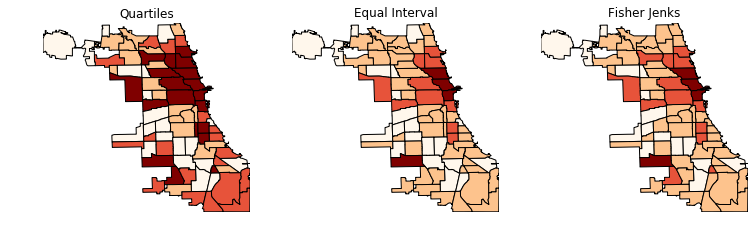

In [39]:
 f,ax = plt.subplots(1,3,figsize=(3.16*4,4))
df.plot(column='price_pp', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='OrRd', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Quartiles")
df.plot(column='price_pp', ax=ax[1], edgecolor='k',
        scheme='equal_interval', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Equal Interval")
df.plot(column='price_pp', ax=ax[2], edgecolor='k',
       scheme='fisher_jenks', cmap='OrRd', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Fisher Jenks")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

In [1]:
pip install palettable

    100% |████████████████████████████████| 81kB 4.8MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [26]:
import palettable as pltt


In [44]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors

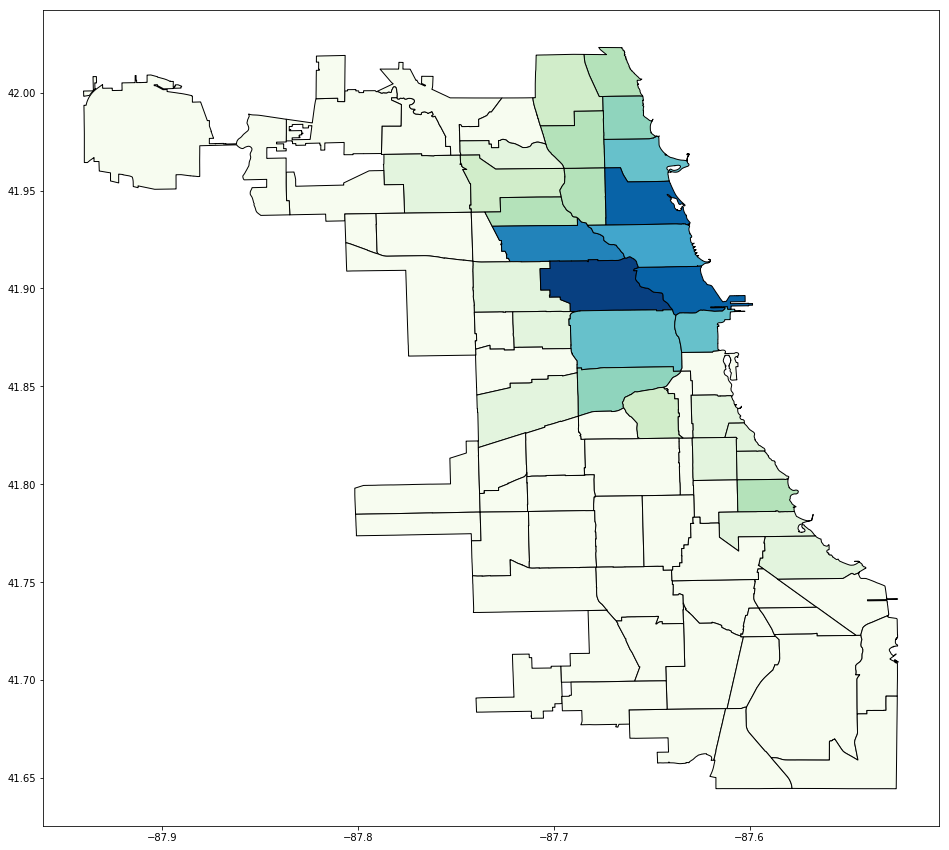

In [66]:
 fig, ax = plt.subplots(figsize=(18,15), subplot_kw={'aspect':'equal'})
df.plot(column='num_spots', edgecolor='k', scheme='Fisher_Jenks', k=10, legend=False, ax=ax, 
        cmap='GnBu')